In [30]:
import pandas as pd

In [31]:
df = pd.read_feather("./hs300/sh.600000.feather")
df

,date,code,open,high,low,close,preclose,volume,amount,adjustflag,turn,tradestatus,pctChg,isST
0,2000-01-04,sh.600000,24.9800,25.7800,24.7500,25.5700,24.7500,4496068,113946783.0000,3,1.405021,1,3.313130,0
1,2000-01-05,sh.600000,25.5700,25.9800,25.1500,25.2800,25.5700,5252814,134465427.0000,3,1.641504,1,-1.134138,0
2,2000-01-06,sh.600000,25.1800,26.3000,25.0500,25.9900,25.2800,6229651,160059798.0000,3,1.946766,1,2.808541,0
3,2000-01-07,sh.600000,26.3000,27.5000,26.1200,26.9000,25.9900,21355330,575751082.0000,3,6.673541,1,3.501346,0
4,2000-01-10,sh.600000,27.0000,27.8500,26.7100,27.2500,26.9000,16539731,450453518.0000,3,5.168666,1,1.301117,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5647,2023-04-24,sh.600000,7.5900,7.6400,7.4700,7.4900,7.5900,43348471,326606926.2200,3,0.147700,1,-1.317500,0
5648,2023-04-25,sh.600000,7.5300,7.6200,7.5200,7.5600,7.4900,42805282,323698544.5900,3,0.145800,1,0.934600,0
5649,2023-04-26,sh.600000,7.5600,7.5600,7.4200,7.4600,7.5600,50919367,380460212.9000,3,0.173500,1,-1.322800,0
5650,2023-04-27,sh.600000,7.4800,7.5100,7.4200,7.4800,7.4600,49269460,367760166.5000,3,0.167900,1,0.268100,0


In [32]:
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates

In [33]:
# Convert date column to numerical format
df['date_num'] = mdates.date2num(df['date'])

# Create a list of OHLC data for each candlestick
ohlcArray = df[['date_num', 'open', 'high', 'low', 'close']].values
ohlcArray = ohlcArray.astype('float64')
ohlcArray

array([[1.0960e+04, 2.4980e+01, 2.5780e+01, 2.4750e+01, 2.5570e+01],
       [1.0961e+04, 2.5570e+01, 2.5980e+01, 2.5150e+01, 2.5280e+01],
       [1.0962e+04, 2.5180e+01, 2.6300e+01, 2.5050e+01, 2.5990e+01],
       ...,
       [1.9473e+04, 7.5600e+00, 7.5600e+00, 7.4200e+00, 7.4600e+00],
       [1.9474e+04, 7.4800e+00, 7.5100e+00, 7.4200e+00, 7.4800e+00],
       [1.9475e+04, 7.4700e+00, 7.6500e+00, 7.4700e+00, 7.6000e+00]])

In [34]:
# # Create a figure and an axis
# fig, ax = plt.subplots()
# # print (ax)
# # Plot the candlestick chart
# candlestick_ohlc(ax, ohlcArray, width=0.6, colorup='red', colordown='green')

# # Format the x-axis to display dates
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
# fig.autofmt_xdate()

# # Set labels and title
# ax.set_xlabel('Date')
# ax.set_ylabel('Price')
# ax.set_title('Candlestick Chart')

# # Show the plot
# plt.show()

In [35]:
ohlc = df[['date_num', 'open', 'high', 'low', 'close']].astype('float32')
ohlc

,date_num,open,high,low,close
0,10960.0,24.980000,25.780001,24.750000,25.570000
1,10961.0,25.570000,25.980000,25.150000,25.280001
2,10962.0,25.180000,26.299999,25.049999,25.990000
3,10963.0,26.299999,27.500000,26.120001,26.900000
4,10966.0,27.000000,27.850000,26.709999,27.250000
...,...,...,...,...,...
5647,19471.0,7.590000,7.640000,7.470000,7.490000
5648,19472.0,7.530000,7.620000,7.520000,7.560000
5649,19473.0,7.560000,7.560000,7.420000,7.460000
5650,19474.0,7.480000,7.510000,7.420000,7.480000


In [36]:
import pandas as pd

# Define the value of N
N = 10

# Create an empty list to store the adjusted close values
adjusted_close = []
adjusted_open = []

# Iterate over each row in the DataFrame
for i, row in ohlc.iterrows():
    # Calculate the "LowN" and "HighN" values
    low_n = ohlc.loc[max(0, i-N):i, 'low'].min()
    high_n = ohlc.loc[max(0, i-N):i, 'high'].max()
    
    # Calculate the adjusted close value
    adj_close = (row['close'] - low_n) / (high_n - low_n)
    adj_open = (row['open'] - low_n) / (high_n - low_n)
    
    # Append the adjusted close value to the list
    adjusted_close.append(adj_close)
    adjusted_open.append(adj_open)

# Assign the list of adjusted close values to the "close" column in the DataFrame
ohlc['normal_close'] = adjusted_close
ohlc['noraml_open'] = adjusted_open

C:\Users\AERO\AppData\Local\Temp\ipykernel_14436\3425455316.py:17: RuntimeWarning: invalid value encountered in float_scalars
  adj_close = (row['close'] - low_n) / (high_n - low_n)
C:\Users\AERO\AppData\Local\Temp\ipykernel_14436\3425455316.py:18: RuntimeWarning: invalid value encountered in float_scalars
  adj_open = (row['open'] - low_n) / (high_n - low_n)


In [37]:
ohlc_temp = ohlc[['date_num', 'noraml_open', 'high', 'low', 'normal_close']]

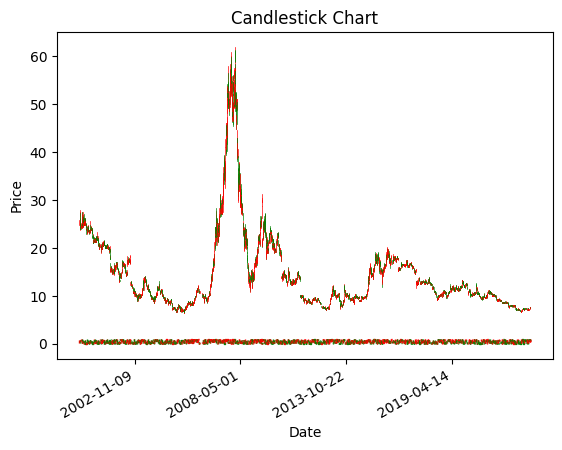

In [38]:
import utils
utils.drawK(ohlc_temp.values)

In [39]:
ohlc

,date_num,open,high,low,close,normal_close,noraml_open
0,10960.0,24.980000,25.780001,24.750000,25.570000,0.796116,0.223300
1,10961.0,25.570000,25.980000,25.150000,25.280001,0.430895,0.666667
2,10962.0,25.180000,26.299999,25.049999,25.990000,0.800000,0.277420
3,10963.0,26.299999,27.500000,26.120001,26.900000,0.781818,0.563636
4,10966.0,27.000000,27.850000,26.709999,27.250000,0.806451,0.725806
...,...,...,...,...,...,...,...
5647,19471.0,7.590000,7.640000,7.470000,7.490000,0.571428,0.750000
5648,19472.0,7.530000,7.620000,7.520000,7.560000,0.696428,0.642857
5649,19473.0,7.560000,7.560000,7.420000,7.460000,0.517857,0.696428
5650,19474.0,7.480000,7.510000,7.420000,7.480000,0.528302,0.528302
